<a href="https://colab.research.google.com/github/asya99/SpamTweetResearch/blob/main/PredictSpamTweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Load the Twitter spam data (5K continuous)
#tSpam with K Nearest Neighbor
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import matplotlib.ticker as ticker
from sklearn.metrics import accuracy_score, classification_report, top_k_accuracy_score
import tensorflow as tf
from tensorflow import keras
from keras import layers
from sklearn import neighbors
from sklearn.neighbors import NearestNeighbors

%matplotlib inline
from google.colab import files

file = files.upload()
df = pd.read_csv('mydata.csv')
df.head()

Saving mydata.csv to mydata (4).csv


,account_age_in_days,num_followers,num_following,num_favorites,num_list,num_tweet,num_retweet,num_hastag,user_mentioned,num_url,num_char,num_digit,class
0,250,0,0,0,0,62,0,1,0,1,29,0,1
1,800,1,5,0,0,64,0,1,0,1,22,0,1
2,978,44,18,0,0,114,0,1,0,1,35,0,1
3,490,0,26,0,0,3840,0,1,0,1,38,0,1
4,248,0,0,0,0,72,0,1,0,1,42,4,1


In [ ]:
#Create datasets for training and testing (30%-70%)
from sklearn.model_selection import train_test_split

#Classification result (class carrying spam or non-spam)
target = df['class']

#Input set (without class column)
inputs = df.drop(columns=['class'])

#Splitting dataset into Training/Test sets 30%-70%
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)
print("training and testing data shape:",len(X_train),len(X_test))
print(X_train[:2])
print(y_train[:2])

training and testing data shape: 428 184
     account_age_in_days  num_followers  num_following  num_favorites  \
254                  690              0              0              0   
146                   62             64             99              0   

     num_list  num_tweet  num_retweet  num_hastag  user_mentioned  num_url  \
254         0         61            0           1               0        1   
146         2        120            0           0               0        1   

     num_char  num_digit  
254        30          0  
146        36          0  
254    1
146    1
Name: class, dtype: int64


#tSpam with Random Forest

Max Accuracy:- 0.9130434782608695 where n index = 5


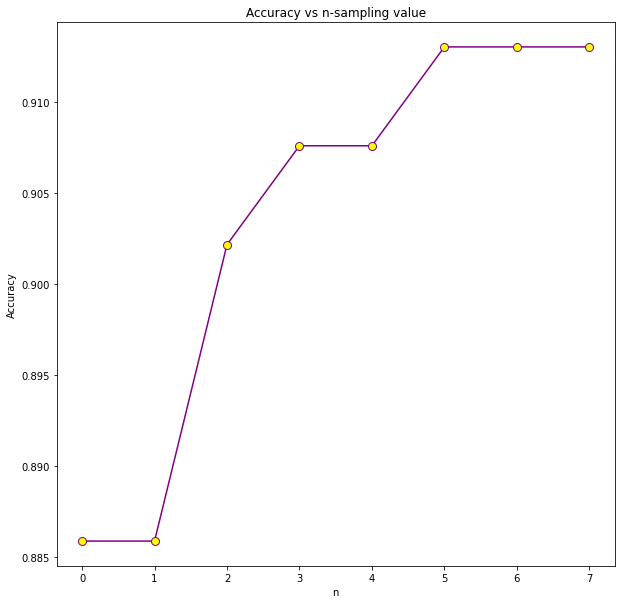

In [ ]:
#Find the best n value for best accuracy
accuracy_score = []
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
for i in (5,10, 20, 50, 100,500,1000, 2000):
    modelRF = RandomForestClassifier(n_estimators=i)
    modelRF.fit(X_train,y_train)
    predict = modelRF.predict(X_test)
    accuracy_score.append(metrics.accuracy_score(y_test, predict))

plt.figure(figsize=(10,10))
plt.plot(accuracy_score, color = 'purple',
         marker='o',markerfacecolor='yellow', markersize=8)
plt.title('Accuracy vs n-sampling value')
plt.xlabel('n')
plt.ylabel('Accuracy')
print("Max Accuracy:-",max(accuracy_score), "where n index =",accuracy_score.index(max(accuracy_score)))

# I get the best result with n=100 and it is consistent over several tries.

In [ ]:
# I got the best accuracy where n=100

#Import Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create Random Forest Classifier. Picking the best fit n=100
modelRF = RandomForestClassifier(n_estimators=100)

In [ ]:
#Train the model using X_train input and expecting y_train set
modelRF.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Make prediction based on the training; this time over test data
y_pred = modelRF.predict(X_test)

#RF model score
rf_acc = modelRF.score(X_test, y_test)
print("Random Forest model score where n=100:",rf_acc)

Random Forest model score where n=100: 0.9021739130434783


In [ ]:
#Make a prediction (non-spammer) for a single tweet with random values
modelRF.predict([[5066,568,83,79,3,0,3493,0,0,2,1,102]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

[[90 12]
 [ 6 76]]


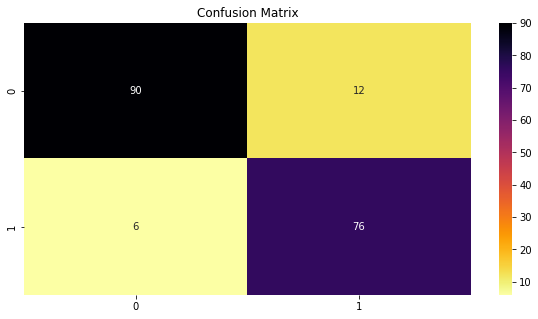

In [ ]:
#Evaluate with Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

rf_cm = confusion_matrix(y_test, y_pred)
print(rf_cm)

#Plot confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix')
sns.heatmap(rf_cm,annot=True,fmt='d',cmap='inferno_r')

In [ ]:
#Expected vs Actual Y values (class) for given X test values

print("Expected classes for given test values")
print(list(y_test[:20]))

#Actual classes
print("Actual classes for given test values")
print(list(y_pred[:20]))


Expected classes for given test values
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
Actual classes for given test values
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0]


In [ ]:
#Accuracy
rf_acc = metrics.accuracy_score(y_test, y_pred)
print("Random Forest Accuracy (n=100",rf_acc)

#Classification report
report = classification_report(y_test,y_pred)
print(report)

Random Forest Accuracy (n=100 0.9021739130434783
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       102
           1       0.86      0.93      0.89        82

    accuracy                           0.90       184
   macro avg       0.90      0.90      0.90       184
weighted avg       0.90      0.90      0.90       184



#tSpam with Navie Bayes

In [ ]:
#Create the model
from sklearn.naive_bayes import GaussianNB
modelNB = GaussianNB()

In [ ]:
#Train the model for 70% of the data
modelNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Make prediction based on the training; this time over test data
y_pred = modelNB.predict(X_test)

#Naive Bayes model score
nb_acc = modelNB.score(X_test, y_test)
print("Naive Bayes score where n=100:",nb_acc)

Naive Bayes score where n=100: 0.6032608695652174


In [ ]:
#Make a prediction (non-spammer) for a single tweet with random values
modelNB.predict([[5066,568,83,79,3,0,3493,0,0,2,1,102]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

[[31 71]
 [ 2 80]]


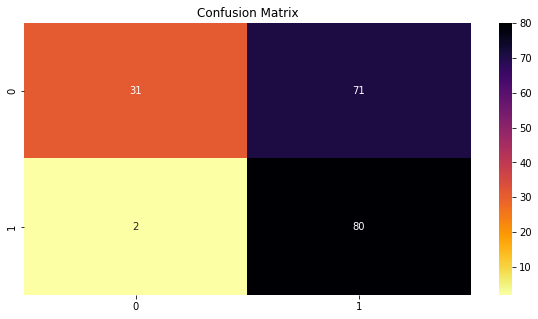

In [ ]:
#Evaluate with Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

nb_cm = confusion_matrix(y_test, y_pred)
print(nb_cm)

#Plot the confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix')
sns.heatmap(nb_cm,annot=True,fmt='d',cmap='inferno_r')

In [ ]:
#Expected vs Actual Y values (class) for a given X test values

print("Expected classes for given test values")
print(list(y_test[:20]))

#Actual classes
print("Actual classes for given test values")
print(list(y_pred[:20]))


Expected classes for given test values
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
Actual classes for given test values
[1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1]


In [ ]:
#Accuracy
nb_acc = metrics.accuracy_score(y_test, y_pred)
print("Naive Bayes",nb_acc)

#Classification report
nb_report = classification_report(y_test,y_pred)
print(nb_report)

Naive Bayes 0.6032608695652174
              precision    recall  f1-score   support

           0       0.94      0.30      0.46       102
           1       0.53      0.98      0.69        82

    accuracy                           0.60       184
   macro avg       0.73      0.64      0.57       184
weighted avg       0.76      0.60      0.56       184



#tSpam with K-Nearest Neighbor (Knn)

In [ ]:
from sklearn import neighbors
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Min err:- 0.11413043478260869 K index = 5


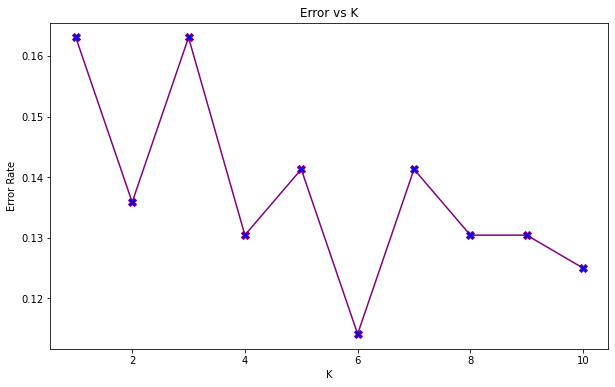

In [ ]:
#Find the best K value by checking error rate
error_rates = []
for k in range(1,11):
 modelKNN = KNeighborsClassifier(n_neighbors=k)
 modelKNN.fit(X_train,y_train)
 predict = modelKNN.predict(X_test)
 error_rates.append(np.mean(predict != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rates,color='purple', marker='X',markerfacecolor='blue', markersize=8)
plt.title('Error vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Min err:-",min(error_rates),"K index =",error_rates.index(min(error_rates)))


Max Accuracy:- 0.8858695652173914 K index  = 5


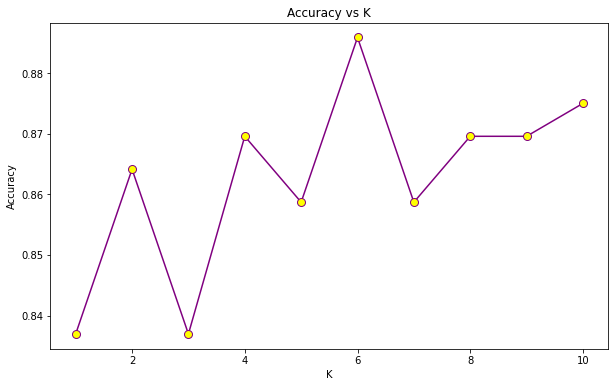

In [ ]:
#Find the best K value by checking accuracy
accuracy_score = []
from sklearn import metrics
for k in range(1,11):
    modelKNN = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    predict = modelKNN.predict(X_test)
    accuracy_score.append(metrics.accuracy_score(y_test, predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,11),accuracy_score, color = 'purple', marker='o',markerfacecolor='yellow', markersize=8)
plt.title('Accuracy vs K')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Max Accuracy:-",max(accuracy_score),"K index  =",accuracy_score.index(max(accuracy_score)))

In [ ]:
#Train Model using the best K value
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k = 2  #best fit
modelKNN = KNeighborsClassifier(n_neighbors = k)

In [ ]:
#Train Model using the best K value
#k = 2  #best fit
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
#Make prediction based on the training; this time over test data
y_pred = modelKNN.predict(X_test)

#KNN model score
knn_acc = modelKNN.score(X_test, y_test)
print("KNN model score where n=100:",knn_acc)

KNN model score where n=100: 0.8641304347826086


In [ ]:
#Make a prediction (non-spammer) for a single tweet with following values
modelRF.predict([[5066,568,83,79,3,0,3493,0,0,2,1,102]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

[[88 14]
 [11 71]]


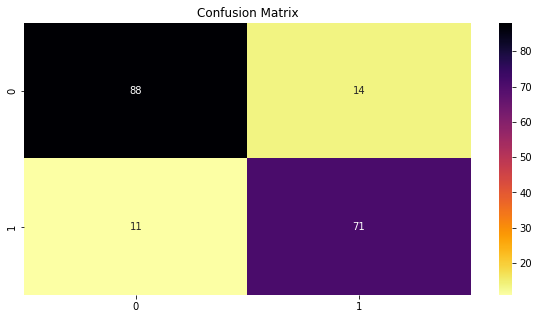

In [ ]:
#Evaluate with Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

knn_cm = confusion_matrix(y_test, y_pred)
print(knn_cm)

#Plot the confusion matrix
plt.figure(figsize=(10,5))
plt.title('Confusion Matrix')
sns.heatmap(knn_cm,annot=True,fmt='d',cmap='inferno_r')

In [ ]:
#Expected vs Actual Y values (class) for a given X test values
print("Expected classes for given test values")
print(list(y_test[:20]))

#Actual classes
print("Actual classes for given test values")
print(list(y_pred[:20]))


Expected classes for given test values
[0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
Actual classes for given test values
[0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0]


In [ ]:
#Accuracy
knn_acc = metrics.accuracy_score(y_test, y_pred)
print("KNN Accuracy (k=2)",knn_acc)

#Classification report
knn_report = classification_report(y_test,y_pred)
print(knn_report)

KNN Accuracy (k=2) 0.8641304347826086
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       102
           1       0.84      0.87      0.85        82

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



#Feature Importance

            Column Name         Score
5             num_tweet  4.956868e+06
1         num_followers  3.481252e+05
2         num_following  1.538274e+05
3         num_favorites  9.858666e+04
6           num_retweet  1.495167e+04
0   account_age_in_days  5.354370e+03
10             num_char  2.550248e+03
4              num_list  1.312979e+03
11            num_digit  1.242622e+02
8        user_mentioned  5.115177e+01
7            num_hastag  3.161104e+01
9               num_url  5.561794e-02


<Figure size 1440x1440 with 0 Axes>

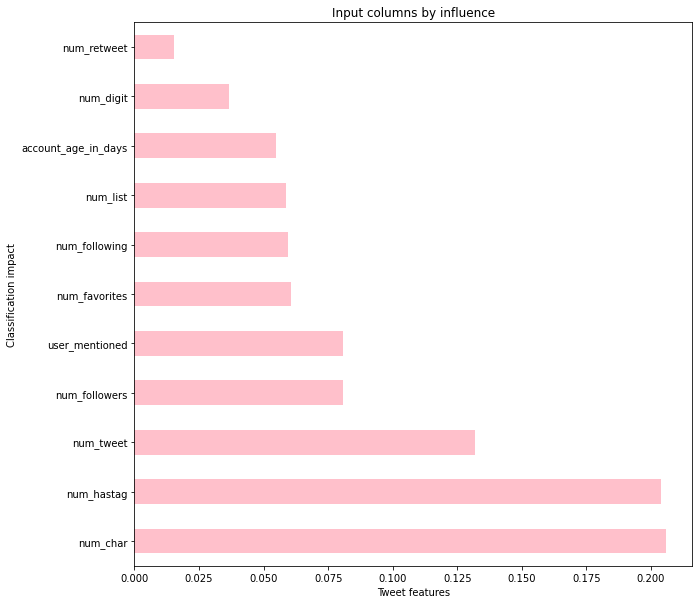

In [ ]:
# Univariate selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#Classification result
target = df['class']

#Input set (without class column)
inputs = df.drop(columns=['class'])

# Splitting the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

#apply SelectKBest to find best k
modelKBest = SelectKBest(score_func=chi2, k=10)
best_fit = modelKBest.fit(X_train,y_train)
best_scores = pd.DataFrame(best_fit.scores_)
influencer_columns = pd.DataFrame(X_train.columns)

inputs_Scores = pd.concat([influencer_columns,best_scores],axis=1)
plt.figure(figsize=(20,20))

inputs_Scores.columns = ['Column Name','Score']
print(inputs_Scores.nlargest(12,'Score'))

#input columns by influence
from sklearn.ensemble import ExtraTreesClassifier
plt.figure(figsize=(10,10))

modelET = ExtraTreesClassifier()

#class result
target = df['class']

#Input set (without class column)
inputs = df.drop(columns=['class'])
#print(inputs)

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.3)

modelET.fit(X_train,y_train)

#input columns by influence
feat_importances = pd.Series(modelET.feature_importances_, index=X_train.columns)
feat_importances.nlargest(11).plot(kind='barh',color="pink")
plt.title('Input columns by influence')
plt.xlabel('Tweet features')
plt.ylabel('Classification impact')

#Plot feature importance
plt.show()

#tSpam NNG - Creating Nearest Neighbor Graph

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (20,20)
import matplotlib
import networkx as nx
from sklearn import preprocessing
from math import sqrt
from scipy.spatial import distance

data_train = pd.DataFrame()
data_train = X_train
data_train['result'] = y_train
data_test = pd.DataFrame()
data_test = X_test
data_test['result'] = y_test

le = preprocessing.LabelEncoder()
data_train['result'] = le.fit_transform(data_train['result'])
data_test['result'] = le.fit_transform(data_test['result'])
data_train_array = data_train.to_numpy()
data_test_array = data_test.to_numpy()

#List to hold spam/nonspam
nonspam_list = []
spam_list     = []

#Calculate Euclidean distance between two data points
def euclidean_distance(a, b): # euclidean distance between rows
    return distance.euclidean(a, b)

# Prepare the actual neighbor list per given number of neighbor
def neighbour_list(data, row, num_neighbors):
    distances_list = list()
    for i in range(len(data)):
        dist = euclidean_distance(row, data[i])
        distances_list.append((data[i], dist,i)) # list of [data, distance,index] of row
    distances_list.sort(key=lambda tup: tup[1]) # sort list of list
    neighbors_list = list()
    for i in range(num_neighbors):
        neighbors_list.append([distances_list[i][2],distances_list[i][0][-1]]) # list of [index,spam or non-spam value as 1 or 0]
    return neighbors_list


#Plot the given graph
def plot_graph(Gnn):
    pos = nx.spring_layout(Gnn)
    nx.draw_networkx_labels(Gnn, pos) # labels
    nx.draw_networkx_nodes(Gnn, pos, cmap=plt.get_cmap('jet'),node_size = 100)
    nx.draw_networkx_edges(Gnn, pos, edgelist=spam_list, edge_color='red', arrows=False) # for spam tweets
    nx.draw_networkx_edges(Gnn, pos, edgelist=nonspam_list, edge_color='blue', arrows=False) # for nonspammer tweets
    plt.draw()
    plt.savefig('graph.jpg', bbox_inches='tight')
    plt.show()

#Construct a directed graph using euclidian distances
def generate_graph(data_array,k):
    Gnn = nx.DiGraph() # initializing directed graph
    Gnn.add_nodes_from(range(len(data_array))) # creating nodes to pick from for graph
    for i in range(len(data_array)):
        neighbors = neighbour_list(data_array, data_array[i], k)
        print(neighbors[:5])
        for neighbor in range(1,len(neighbors)): # iterating over function
            if neighbors[neighbor][1] == 0: # 0 means spam so the data point or node will get appended into spam list
                if not (((i,neighbors[neighbor][0]) in spam_list) or ((neighbors[neighbor][0],i) in spam_list)):
                    spam_list.append((i,neighbors[neighbor][0]))
            else: # 1 means nonspam so the data point or node will get appended into nonspam list
                if not (((i,neighbors[neighbor][0]) in nonspam_list) and ((neighbors[neighbor][0],i) in nonspam_list)):
                    nonspam_list.append((i,neighbors[neighbor][0]))
            Gnn.add_edge(i,neighbors[neighbor][0]) # add edge
    return Gnn

<ipython-input-162-8633f269bc19>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  principalComponents  = pca.fit_transform(data_train.drop(['result'],1))


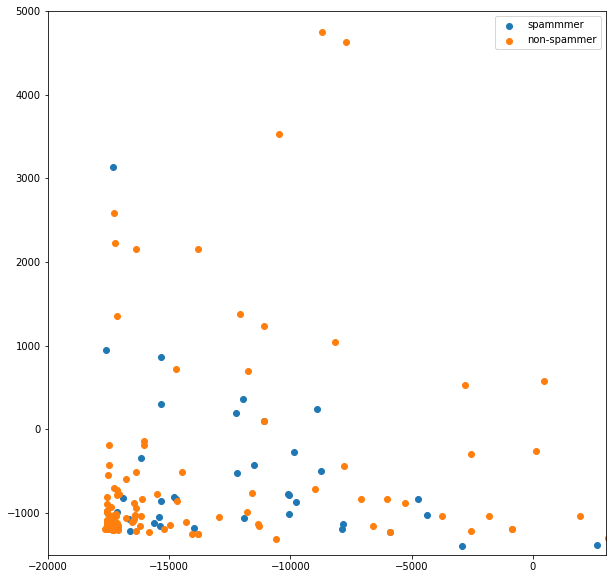

In [ ]:
from sklearn.decomposition import PCA
import pandas as pd
pca = PCA(n_components=2) # Pca of two components
principalComponents  = pca.fit_transform(data_train.drop(['result'],1))
pca_df = pd.DataFrame(principalComponents,columns = ['PCA1','PCA2'])
pca_df['result'] = data_train['result']
colors = ['red','green']
plt.figure(figsize=(10, 10))
for i in range(2):
    if i == 0:
        lab = "spammmer"
    else:
        lab = "non-spammer"
    temp_df = pca_df[pca_df['result'] == i]
    plt.scatter(temp_df['PCA1'], temp_df['PCA2'],cmap=matplotlib.colors.ListedColormap(colors[i]), label=lab)
plt.ylim(-1500, 5000)
plt.xlim(-20000,3000)
plt.legend()

plt.show()

[[0, 1], [408, 1]]
[[1, 1], [218, 1]]
[[2, 0], [213, 0]]
[[3, 0], [315, 0]]
[[4, 1], [71, 1]]
[[5, 0], [373, 1]]
[[6, 0], [46, 0]]
[[7, 0], [354, 1]]
[[8, 1], [375, 1]]
[[9, 1], [383, 1]]
[[10, 0], [55, 0]]
[[11, 1], [273, 1]]
[[12, 1], [133, 1]]
[[13, 1], [301, 1]]
[[14, 1], [226, 1]]
[[15, 1], [199, 1]]
[[16, 0], [281, 1]]
[[17, 1], [182, 1]]
[[18, 0], [372, 0]]
[[19, 0], [99, 1]]
[[20, 1], [192, 1]]
[[21, 0], [277, 0]]
[[22, 1], [402, 1]]
[[23, 0], [213, 0]]
[[24, 1], [286, 1]]
[[25, 1], [169, 1]]
[[26, 1], [356, 1]]
[[27, 1], [178, 0]]
[[28, 1], [427, 1]]
[[29, 0], [241, 1]]
[[30, 0], [381, 0]]
[[31, 0], [64, 0]]
[[32, 0], [385, 0]]
[[33, 0], [323, 1]]
[[34, 1], [256, 1]]
[[35, 1], [285, 1]]
[[36, 1], [350, 1]]
[[37, 1], [222, 1]]
[[38, 1], [419, 1]]
[[39, 1], [415, 1]]
[[40, 0], [51, 0]]
[[41, 1], [238, 0]]
[[42, 0], [175, 0]]
[[43, 0], [134, 0]]
[[44, 0], [59, 1]]
[[45, 1], [253, 1]]
[[46, 0], [6, 0]]
[[47, 1], [133, 1]]
[[48, 0], [262, 0]]
[[49, 1], [173, 0]]
[[50, 1], [202, 1]]

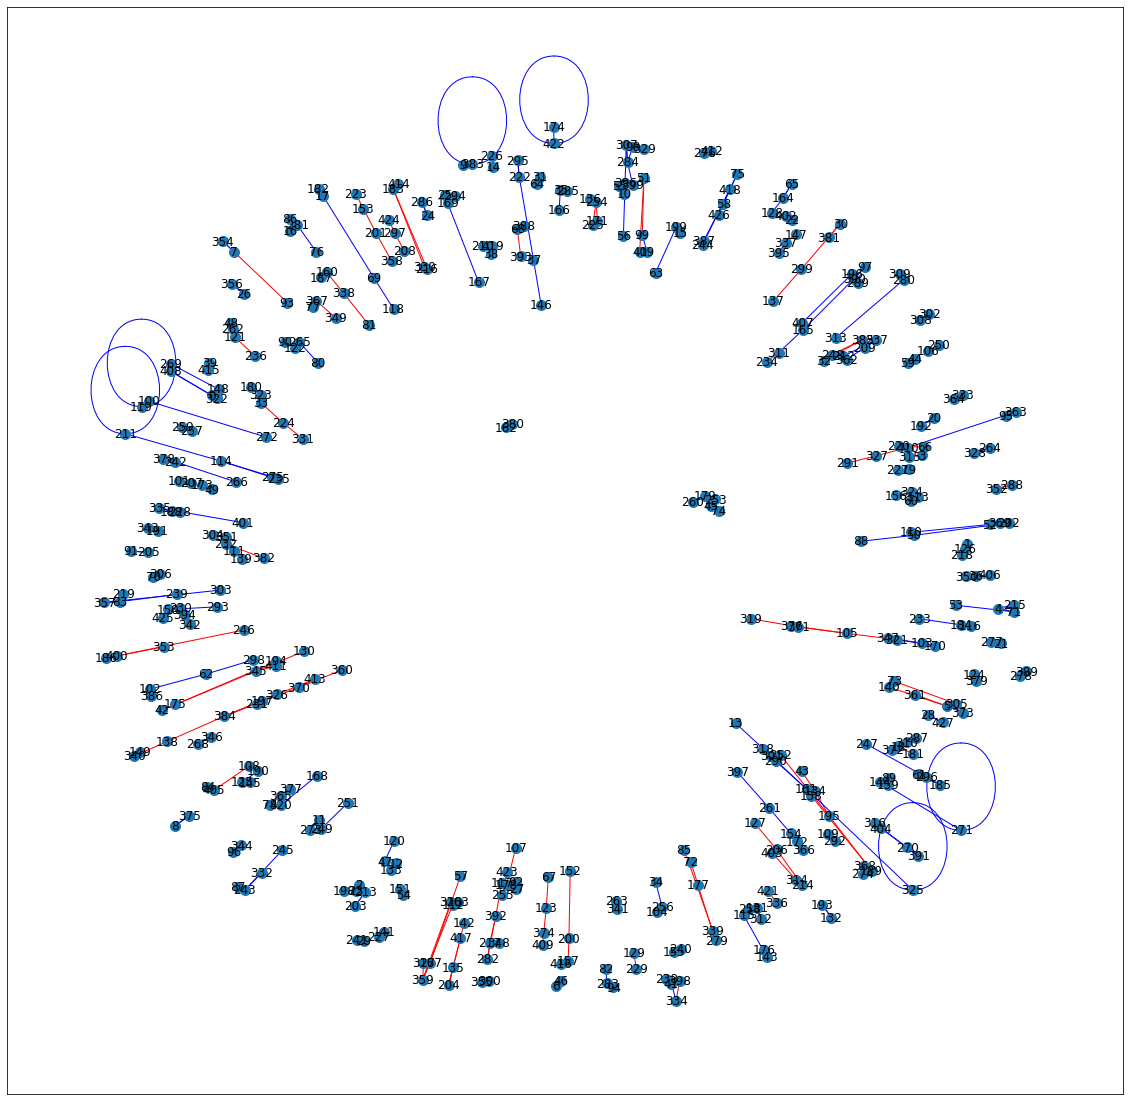

In [ ]:
#plot the graph for k=2
Gnn = generate_graph(data_train_array, 2)

#Plot the NNG
plot_graph(Gnn)

Epoch 1/30
43/43 [==============================] - 1s 8ms/step - loss: 3341.1558 - accuracy: 0.5280 - val_loss: 1867.1316 - val_accuracy: 0.4565
Epoch 2/30
43/43 [==============================] - 0s 3ms/step - loss: 1512.9076 - accuracy: 0.5280 - val_loss: 860.2381 - val_accuracy: 0.4565
Epoch 3/30
43/43 [==============================] - 0s 4ms/step - loss: 622.1439 - accuracy: 0.4276 - val_loss: 228.3287 - val_accuracy: 0.5489
Epoch 4/30
43/43 [==============================] - 0s 5ms/step - loss: 70.8613 - accuracy: 0.6939 - val_loss: 16.4598 - val_accuracy: 0.8424
Epoch 5/30
43/43 [==============================] - 0s 4ms/step - loss: 14.2934 - accuracy: 0.8575 - val_loss: 13.0687 - val_accuracy: 0.8315
Epoch 6/30
43/43 [==============================] - 0s 4ms/step - loss: 12.0893 - accuracy: 0.8598 - val_loss: 11.6898 - val_accuracy: 0.8261
Epoch 7/30
43/43 [==============================] - 0s 4ms/step - loss: 9.9570 - accuracy: 0.8528 - val_loss: 10.4737 - val_accuracy: 0.820

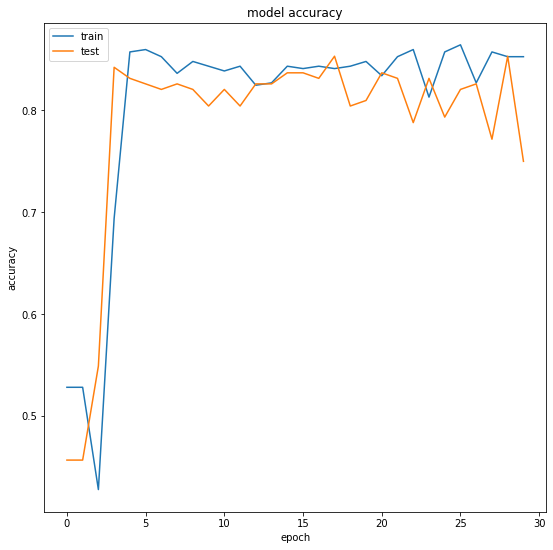

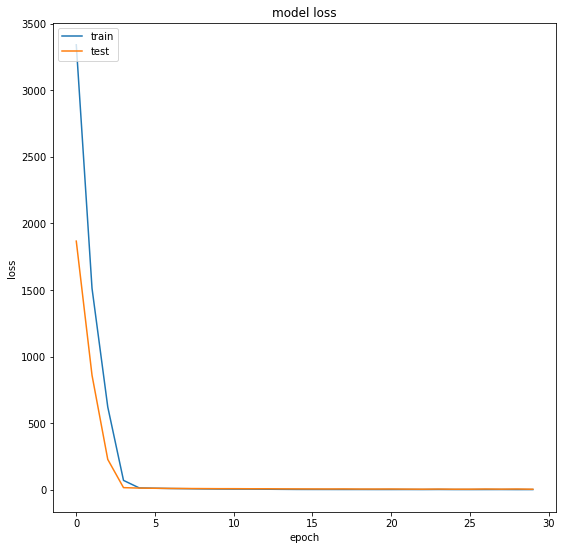

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Activation, Dense
from matplotlib.pyplot import figure

#Ref towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02
#Fix random seed for ease of reproduction
seed = 5
np.random.seed(seed)

# Make numpy values easier to read
np.set_printoptions(precision=3, suppress=True)

from google.colab import files
#file = files.upload()
dataset = pd.read_csv("mydata.csv")

dataset.head()

#Separate features/labels for training
X = df.copy()
Y = X.pop('class')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

#Create the model
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=30, batch_size=10)

#List all data
print(history.history.keys())
print(history.history.keys())

#Summarize accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.rcParams["figure.figsize"] = [9,9]
plt.show()

#Summarize loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.rcParams["figure.figsize"] = [9,9]
plt.show()

#Keras with KNN

Train data shape: (469, 613)
Test data shape: (143, 613)
Model: "baseline"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_features (InputLayer)    [(None, 613)]        0           []                               
                                                                                                  
 ffn_block1 (Sequential)        (None, 32)           23284       ['input_features[0][0]']         
                                                                                                  
 ffn_block2 (Sequential)        (None, 32)           2368        ['ffn_block1[0][0]']             
                                                                                                  
 skip_connection2 (Add)         (None, 32)           0           ['ffn_block1[0][0]',             
                                  

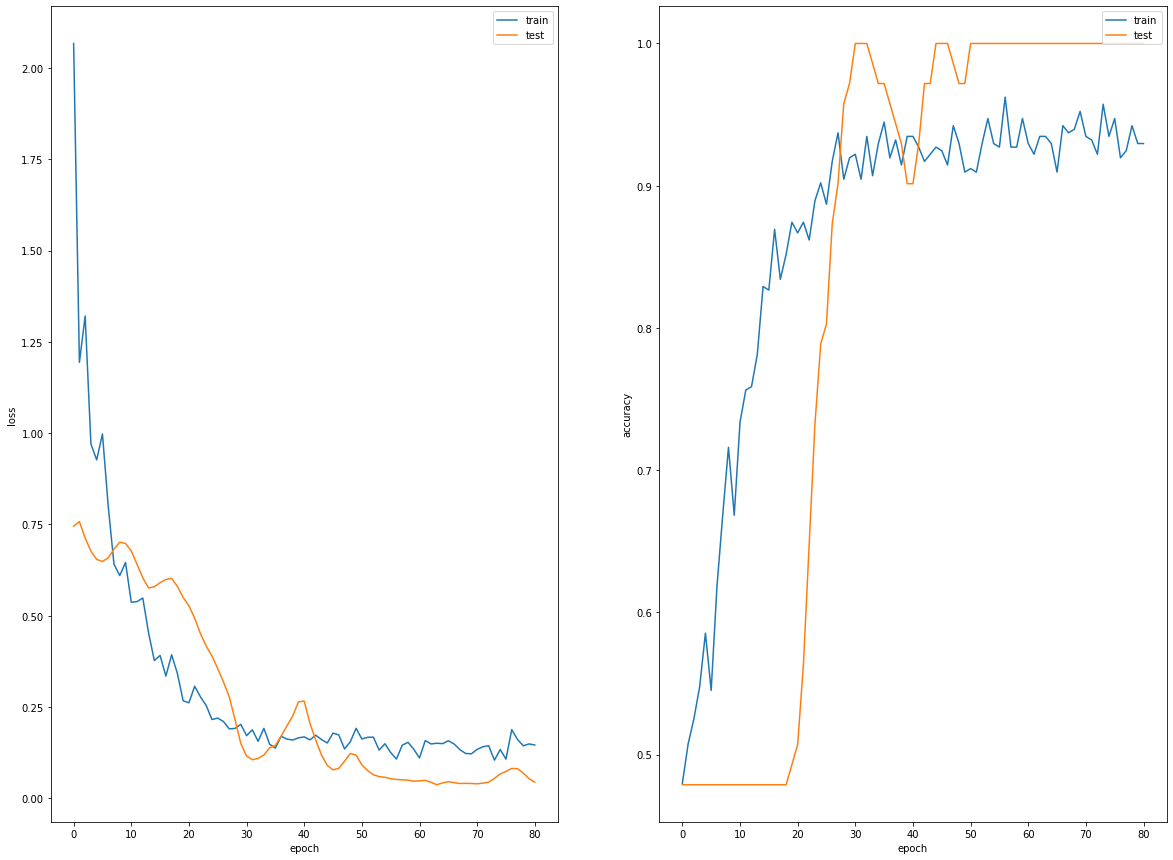

In [ ]:
X = df.drop(columns=['class'])
Y = df['class']
neigh = NearestNeighbors(n_neighbors=3)
neigh.fit(X)

A = neigh.kneighbors_graph(X)
A = A.toarray()
A.shape

A_df = pd.DataFrame(A)
A_df['class'] = Y

train_data, test_data = [], []

# Select dataset for training
for _, group_data in A_df.groupby("class"):
    random_selection = np.random.rand(len(group_data.index)) <= 0.75
    train_data.append(group_data[random_selection])
    test_data.append(group_data[~random_selection])

train_data = pd.concat(train_data).sample(frac=1)
test_data = pd.concat(test_data).sample(frac=1)

print("Train data shape:", train_data.shape)
print("Test data shape:", test_data.shape)

hidden_units = [32, 32]
learning_rate = 0.01
dropout_rate = 0.5
num_epochs = 100
batch_size = 256


#training the model
def run_experiment(model, x_train, y_train):
    model.compile(
      optimizer=keras.optimizers.Adam(learning_rate),
      loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
      metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

    early_stopping = keras.callbacks.EarlyStopping(
      monitor="val_acc", patience=50, restore_best_weights=True
    )
    # Fit the model
    history = model.fit(
      x=x_train,
      y=y_train,
      epochs=num_epochs,
      batch_size=batch_size,
      validation_split=0.15,
      callbacks=[early_stopping],
    )
    return history

#plot accuracy & loss
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 15))

    ax1.plot(history.history["loss"])
    ax1.plot(history.history["val_loss"])
    ax1.legend(["train", "test"], loc="upper right")
    ax1.set_xlabel("epoch")
    ax1.set_ylabel("loss")

    ax2.plot(history.history["acc"])
    ax2.plot(history.history["val_acc"])
    ax2.legend(["train", "test"], loc="upper right")
    ax2.set_xlabel("epoch")
    ax2.set_ylabel("accuracy")
    plt.show()

#genetates keras layes
def create_ffn(hidden_units, dropout_rate, name=None):
    fnn_layers = []

    for units in hidden_units:
        fnn_layers.append(layers.BatchNormalization())
        fnn_layers.append(layers.Dropout(dropout_rate))
        fnn_layers.append(layers.Dense(units, activation=tf.nn.gelu))

    return keras.Sequential(fnn_layers, name=name)

feature_names = set(A_df.columns)
num_features = len(feature_names)
num_classes = 2
num_features,num_classes

#Create train and test features
x_train = train_data[feature_names].to_numpy()
x_test = test_data[feature_names].to_numpy()

#Create train and test targets
y_train = train_data["class"]
y_test = test_data["class"]


#creates the base model for keras

def create_baseline_model(hidden_units, num_classes, dropout_rate=0.2):
    inputs = layers.Input(shape=(num_features,), name="input_features")
    x = create_ffn(hidden_units, dropout_rate, name=f"ffn_block1")(inputs)
    for block_idx in range(4):

        # Create FFN block
        x1 = create_ffn(hidden_units, dropout_rate, name=f"ffn_block{block_idx + 2}")(x)
        x = layers.Add(name=f"skip_connection{block_idx + 2}")([x, x1])

    logits = layers.Dense(num_classes, name="logits")(x)

    # Create the model
    return keras.Model(inputs=inputs, outputs=logits, name="baseline")


baseline_model = create_baseline_model(hidden_units, num_classes, dropout_rate)
baseline_model.summary()

history = run_experiment(baseline_model, x_train, y_train)
_, test_accuracy = baseline_model.evaluate(x=x_test, y=y_test, verbose=0)


#Epoch results
print(f"Test accuracy: {round(test_accuracy * 100, 2)}%")


#plot the graph for acc & loss
display_learning_curves(history)
